In [2]:
import numpy as np
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)
plt.rc('axes', labelsize=6)
#axes.linewidth : 0.5
plt.rc('axes', linewidth=0.5)
#ytick.major.width : 0.5
plt.rc('ytick.major', width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rc('ytick.minor', visible=True)

#plt.style.use(r"..\..\styles\infocom.mplstyle") # Insert your save location here

# width as measured in inkscape
fig_width = 3.487
fig_height = fig_width / 1.618
#fig_height = fig_width / 1.3 / 2

In [3]:
small_link_data = np.zeros((5, 10))
small_node_data = np.zeros((5, 10))
print(small_link_data)
with open("failure/small-link-utilization.csv", "r") as f:
    f1 = f.readlines()
    for index in range(1, 11):
        line = f1[index]
        line = line.split(",")
        for i in range(0, 5):
            small_link_data[i, index-1] = line[i]
        print(line)
    print(type(f1))

with open("failure/small-node_utilization.csv", "r") as f:
    f1 = f.readlines()
    for index in range(1, 11):
        line = f1[index]
        line = line.split(",")
        for i in range(0, 5):
            small_node_data[i, index-1] = line[i]
        print(line)
    print(type(f1))
print(small_link_data)
print(type(small_link_data[0,0]))
#x = np.arange(0.0, 3*np.pi , 0.1)
#plt.plot(x, np.sin(x))
#plt.show()
small_link_data = 100 * small_link_data
small_node_data = 100 * small_node_data

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
['0.04626683', '0.067074663', '0.074418605', '0.075887393', '0.110893513\n']
['0.060238095', '0.104434907', '0.111587983', '0.11349547', '0.150925486\n']
['0.082385704', '0.112584322', '0.118589', '0.121605941', '0.148071148\n']
['0.102216192', '0.121033545', '0.137899955', '0.148039658', '0.146105358\n']
['0.115578994', '0.131049724', '0.146341463', '0.149197978', '0.143265216\n']
['0.124678663', '0.145896003', '0.14545844', '0.145209581', '0.140290847\n']
['0.126333403', '0.142377857', '0.142020498', '0.141664928', '0.137492176\n']
['0.133033156', '0.138741316', '0.138968481', '0.138401957', '0.135973867\n']
['0.135501896', '0.135501896', '0.135501896', '0.135501896', '0.135501896\n']
['0.135501896', '0.135501896', '0.135501896', '0.135501896', '0.135501896\n']
<class 'list'>
['0.117105263', '0.139912281', '0.146929825',

In [4]:
x = [0, '60', '70', '80']
x_tick_label_list = ['60', '70', '80']
#objective = [[455, 521, 566, 566, 630], # CC-ILP
#             [436, 491, 562, 562, 623],# proposed
#             [346, 465, 502, 502, 530]] # NC
objective = [[1165, 2343, 3675],
             [2047, 3400, 4176],
             [3508, 4739, 5055],
             [3753, 4769, 5153],
             [4433, 5920, 5953]]

time_means = [[0.36, 0.17, 0.33],
              [5.28, 1.81, 40.84],
              [2613.23, 8.17, 45313.95],
              [2628.48, 18.8, 181778.9],
              [43.23, 7.00, 33.4]];
             
error = [[0, 0, 0.0564, 20, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0.0494, 24, 0]]

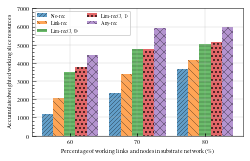

In [7]:
N = 3
ind = np.arange(N) 
width = 1 / 6

fig, (ax1) = plt.subplots(1, 1)
#ax1.bar(x, objective)
#ax1.bar(x, objective[0])
label_list = ['No-rec', 'Link-rec', 'Lim-rec(3, 0)', 'Lim-rec(3, 1)', 'Any-rec']
patterns = ('//////','\\\\\\','---',  'ooo', 'xxx', '\\', '\\\\','++', '*', 'O', '.')

plt.rcParams['hatch.linewidth'] = 0.25  # previous pdf hatch linewidth
#plt.rcParams['hatch.linewidth'] = 1.0  # previous svg hatch linewidth
#plt.rcParams['hatch.color'] = 'r'

for i in range(5):
    if i == 2:
        ax1.bar(ind + width * (i-2), objective[i], width, label=label_list[i],
               hatch=patterns[i], alpha=0.7,
               tick_label=x_tick_label_list)
               #yerr=error[i], ecolor='black', capsize=1)
    else:
        ax1.bar(ind + width * (i-2), objective[i], width, label=label_list[i],
                hatch=patterns[i], alpha=0.7)

#ax1.set_xticklabels(x)
ax1.set_ylabel('Accumulated weighted working slice resources')
ax1.set_xlabel('Percentage of working links and nodes in substrate network (\%)')
ax1.set_ylim(0, 7000)

#ax1.xaxis.set_label_coords(0.5,-0.17)
#ax1.yaxis.set_label_coords(-0.17,0.5)



ax1.legend(loc='upper left',# bbox_to_anchor=(0.5, 1.2),
          ncol=2, prop={'size': 5})
#ax1.legend(loc='best')
fig.set_size_inches(fig_width, fig_height)
#mpl.pyplot.subplots_adjust(wspace = 0.3)

fig.subplots_adjust(left=.13, bottom=.13, right=.97, top=.95)
#ax1.grid(color='b', ls = '-.', lw = 0.25)
ax1.grid(lw = 0.25)


plt.show()
fig.savefig('test-heuristic-failure.pdf')